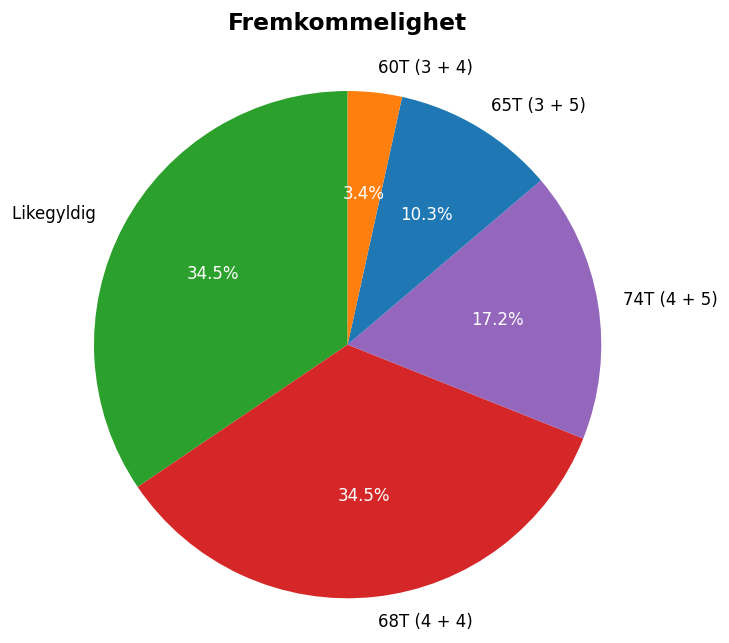

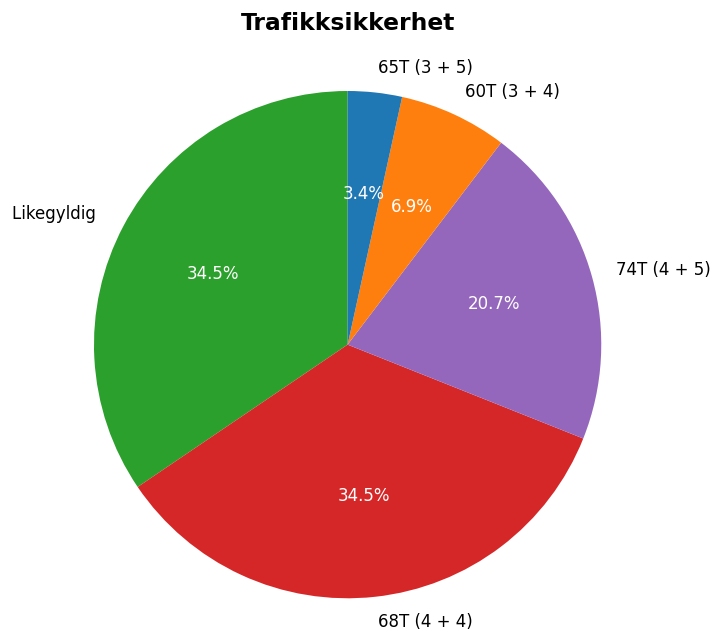

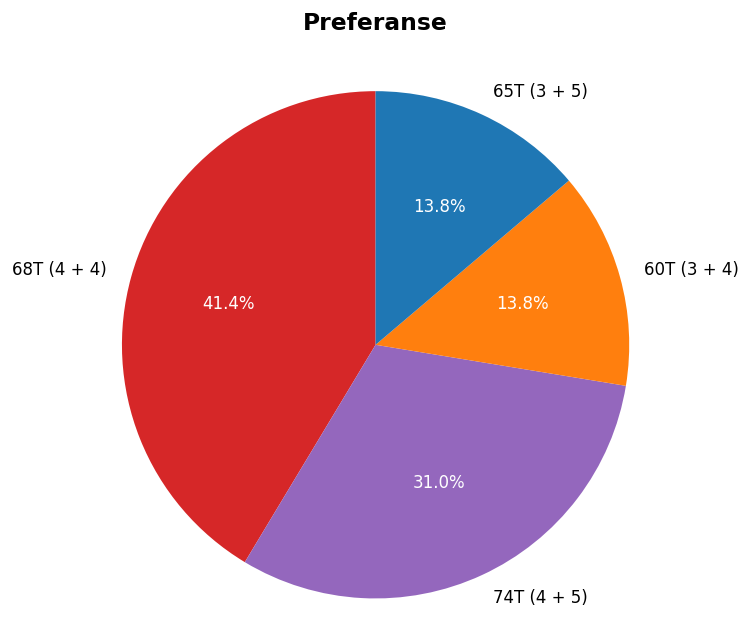

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Data from CSV
df = pd.read_csv("experiences_from_the_drivers.csv", sep=";")

configuration = lambda tonnage: '(3 + 4)' if tonnage == '60T' else '(3 + 5)' if tonnage == '65T' else '(4 + 4)' if tonnage == '68T' else '(4 + 5)' if tonnage == '74T' else ''

# Step 2: Define a Default Color Palette
color_palette = plt.cm.tab10.colors  # Default palette
unique_categories = pd.concat([
    df["fremkommelighet"], 
    df["trafikksikkerhet"], 
    df["preferanse"]
]).unique()
color_map = dict(zip(unique_categories, color_palette))  # Map category to a color

# Step 3: Helper Function to Plot Pie Charts
def plot_pie_chart(category, reason_column, title):
    # Calculate value counts
    value_counts = df[category].value_counts()
    
    # Find the top reason for each individual category
    top_reasons = (
        df.groupby(category)[reason_column]
        .apply(lambda group: group.value_counts().idxmax())
    )
    
    # Prepare labels with top reasons appended
    labels_with_reasons = [
        # f"{label} ({top_reasons[label]})" for label in value_counts.index
        f'{label} {configuration(label)}' for label in value_counts.index
    ]
    
    # Get colors for the categories
    colors = [color_map[label] for label in value_counts.index if label in color_map]
    
    # Create pie chart
    fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
    wedges, texts, autotexts = ax.pie(
        value_counts,
        labels=labels_with_reasons,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
    )
    ax.set_title(title, fontsize=14, weight='bold', y=1.05)
    ax.axis('equal')  # Equal aspect ratio ensures a perfect circle
    
    # Style the text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
    
    plt.show()

# Step 4: Generate Separate Pie Charts
plot_pie_chart("fremkommelighet", "fremkommelighet_begrunnelse", "Fremkommelighet")
plot_pie_chart("trafikksikkerhet", "trafikksikkerhet_begrunnelse", "Trafikksikkerhet")
plot_pie_chart("preferanse", "preferanse_begrunnelse", "Preferanse")


In [2]:
sjåfører = df['sjåfør'].unique()

In [3]:
sjåfører

array(['erik carlsson', 'kjell erik roen', 'carl borde røsen',
       'finn gaarder', 'stian østby', 'bendik moen', 'jan ivar simensen',
       'raymond bekken', 'syver simensen', 'espen smedås',
       'ole håkon moberget', 'morten engen', 'arne erling hansen',
       'håvard kløften'], dtype=object)

In [4]:
len(sjåfører)

14